# Импорт

In [22]:
# import pylab as pl
# import numpy as np
import pandas as pd
import seaborn as sns
# import scipy.optimize as opt
# import scipy.stats as stats
import matplotlib.pyplot as plt
# from scipy.stats import randint
# %matplotlib inline

# Загрузка данных

In [23]:
# Загрузим наши датасеты
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [24]:
train_df.shape

(600000, 15)

In [25]:
test_df.shape

(400000, 14)

Т.к. датасеты идентичны и отличаются только кол-вом пациентов, работать будем с тренировочными данными. Позже применим все преобразования и к тестовым данным.

In [26]:
train_df.head()

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0


# Пояснения к столбцам

In [27]:
train_df.columns

Index(['ID', 'age', 'sex', 'chest', 'resting_blood_pressure',
       'serum_cholestoral', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'number_of_major_vessels', 'thal', 'class'],
      dtype='object')

1) *'ID'*: ID пациента;

2) *'age'*: возраст;

3) *'sex'*: пол;

4) *'chest'*: тип боли в груди (от 1 до 4);

5) *'resting_blood_pressure'*: артериальное давление в состоянии покоя;

6) *'serum_cholestoral'*: уровень холестерина в крови в mg/dl;

7) *'fasting_blood_sugar'*: анализ глюкозы в крови натощак (> 120 mg/dl);

8) *'resting_electrocardiographic_results'*: результаты электрокардиографических исследований в покое (3 значения, 0-2);

9) *'maximum_heart_rate_achieved'*: максимальная частота сердечных сокращений;

10) *'exercise_induced_angina'*: стенокардия при нагрузке;

11) *'oldpeak'*: депрессия ST-сегмента;

12) *'slope'*: наклон пикового сегмента ST при физической нагрузке;

13) *'number_of_major_vessels'*: количество крупных сосудов (0-3), окрашенных с помощью флюороскопии;

14) *'thal'*: 3 = норма; 6 = фиксированный дефект; 7 = обратимый дефект;

15) *'class'*: отсутствие (0) или наличие заболеваний сердца (1).

# Подготовка данных

In [28]:
# Проверим информацию о данных, типе данных и отсутствующих значения
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    400000 non-null  int64  
 1   age                                   400000 non-null  float64
 2   sex                                   400000 non-null  int64  
 3   chest                                 400000 non-null  float64
 4   resting_blood_pressure                400000 non-null  float64
 5   serum_cholestoral                     400000 non-null  float64
 6   fasting_blood_sugar                   400000 non-null  int64  
 7   resting_electrocardiographic_results  400000 non-null  int64  
 8   maximum_heart_rate_achieved           400000 non-null  float64
 9   exercise_induced_angina               400000 non-null  int64  
 10  oldpeak                               400000 non-null  float64
 11  

In [29]:
# Список категориальных столбцов
cat_cols = ['sex', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 'exercise_induced_angina', 'slope', 'number_of_major_vessels', 'thal']

In [30]:
# Проверяем кол-во уникальных значений в категориальных столбцах

print("Категориальные столбцы:", cat_cols)
print("\n")

for i in cat_cols:
    if i in train_df.columns:
        print("Значения в столбце {0}: \n{1}".format(i, train_df[i].value_counts().sort_index()))
        print("\n")
    else:
        print(f"Столбца {i} нет в датасете.")


Категориальные столбцы: ['sex', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 'exercise_induced_angina', 'slope', 'number_of_major_vessels', 'thal']


Значения в столбце sex: 
sex
0    193532
1    406468
Name: count, dtype: int64


Значения в столбце fasting_blood_sugar: 
fasting_blood_sugar
0    509546
1     90454
Name: count, dtype: int64


Значения в столбце resting_electrocardiographic_results: 
resting_electrocardiographic_results
0    290609
1      6693
2    302698
Name: count, dtype: int64


Значения в столбце exercise_induced_angina: 
exercise_induced_angina
0    399899
1    200101
Name: count, dtype: int64


Значения в столбце slope: 
slope
1    289149
2    264082
3     46769
Name: count, dtype: int64


Значения в столбце number_of_major_vessels: 
number_of_major_vessels
0    353137
1    129017
2     73773
3     44073
Name: count, dtype: int64


Значения в столбце thal: 
thal
3    334624
6     34677
7    230699
Name: count, dtype: int64




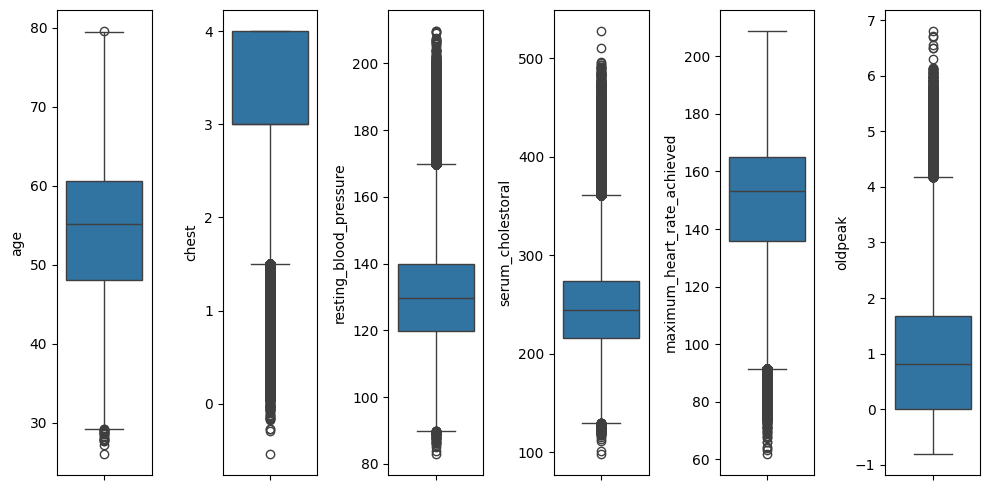

In [31]:
# Посмотрим числовые столбцы с помощью boxplots
num_cols = ['age', 'chest', 'resting_blood_pressure', 'serum_cholestoral', 'maximum_heart_rate_achieved', 'oldpeak']

plt.figure(figsize=(10,5))
for i in range(0,len(num_cols)):
    plt.subplot(1,len(num_cols),i+1)
    sns.boxplot(y=train_df[num_cols[i]])
    plt.tight_layout()

In [32]:
# Избавимся от точек за пределами 1,5*IQR
for i in num_cols:
    Q1 = train_df[i].quantile(0.25)
    Q3 = train_df[i].quantile(0.75)
    IQR = Q3-Q1
    LowerBound = Q1 - (1.5 * IQR)
    UpperBound = Q3 + (1.5 * IQR)

    train_df = train_df[(train_df[i] >= LowerBound)&(train_df[i] <= UpperBound)]

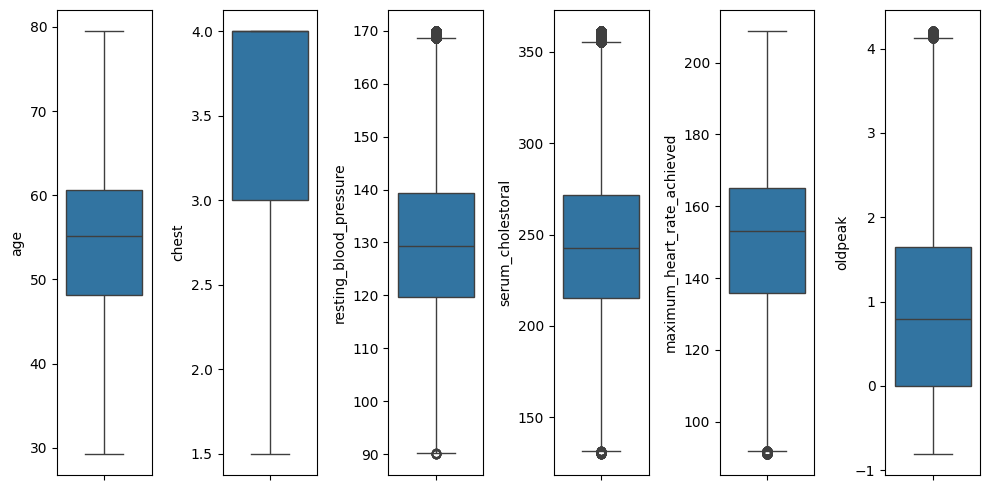

In [33]:
# Проверим выбросы после обработки
plt.figure(figsize=(10,5))
for i in range(0,len(num_cols)):
    plt.subplot(1,len(num_cols),i+1)
    sns.boxplot(y = train_df[num_cols[i]])
    plt.tight_layout()

In [34]:
train_df.shape

(499427, 15)

In [35]:
# Проверим на пропущенные значения
train_df.isna().sum()

ID                                      0
age                                     0
sex                                     0
chest                                   0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
class                                   0
dtype: int64

In [36]:
# Проверим на дубликаты
train_df.duplicated().sum()

0

In [ ]:
# # Удаляем дубликаты
# train_df = train_df.drop_duplicates()

# # Проверяем данные после удаления дубликатов
# train_df.duplicated().sum()

In [43]:
# Удаляем столбец 'ID', который не несёт никакой информации
train_df = train_df.drop(['ID'], axis=1)

In [45]:
train_df.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0


In [46]:
train_df.shape

(499427, 14)

# EDA (Exploratory Data Analysis): разведочный анализ данных